In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from numpy import diff
from scipy.stats import sem
import os

In [2]:
data = pd.read_csv("ring_down/ring_down_05.txt", sep = "\t", skiprows = range(0,1))

In [3]:
print(data)
print(type(data))

              (us)        (mV)
0      -250.001991  211.752600
1      -250.000991  211.752600
2      -249.999991  211.752600
3      -249.998991  216.350900
4      -249.997991  216.350900
...            ...         ...
499999  249.996995   13.810280
500000  249.997995    9.196604
500001  249.998995   13.810280
500002  249.999995   13.810280
500003  250.000995   13.810280

[500004 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


RangeIndex(start=0, stop=500004, step=1)
[245002 245003 245004 ... 500001 500002 500003]
[255002 255003 255004 ... 500001 500002 500003]
245002
[-22.42382767 109.09844739]


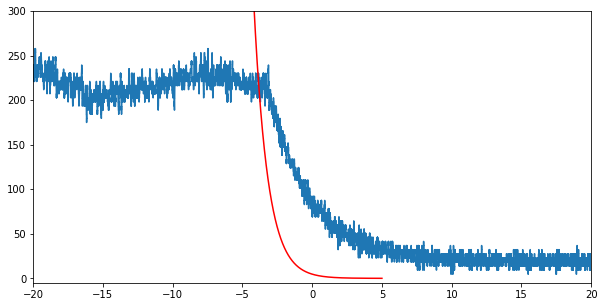

In [4]:
plt.figure(figsize = (10,5))
x = data['(us)']
y = data['(mV)']
plt.plot(x, y)
plt.xlim([-20, 20])
plt.ylim([-5, 300])
print(x.index)
print(data[data['(us)']>=-5].index.values)
print(data[data['(us)']>=5].index.values)


xnp = x.to_numpy()
ynp = y.to_numpy()

start = np.where(xnp>=-5)
print(start[0][0])
xnp1 = xnp[245002:255002]
ynp1 = ynp[245002:255002]

curve_fit = np.polyfit(xnp1, ynp1, 1)
print(curve_fit)
fit = np.log(109)*np.exp(-xnp1) 

plt.plot(xnp1, fit, color = "red")
plt.show()

# xnp1 = np.arange(np.where(xnp>=-5)[0], np.where(xnp>=5)[0])
# print(xnp1)


# print(np.where(xnp>=10))
# print(xnp.index[-20])

# xnp = x.to_numpy()
# ynp = y.to_numpy()
# print(xnp.index(-20)
# fit = np.polyfit(x, np.log(y), 1)
# plt.fit()

# def exp_decay(t, a, tau, b):
#     return a*np.exp(-t/tau) + b
# popt, pcov = scipy.optimize.curve_fit(exp_decay, x, y_noisy)

# xnp = xnp.range(-10,10)
# curve_fit = np.polyfit(x, y, 1)
# print(curve_fit)
# fit = np.exp(-0.605*xnp)
# plt.plot(xnp, fit, color = "red")
      

# Writing clean code again

246802
255002
Amplitude: 64.7703372980219 Decay constant: 2.91185264397831 Constant: 20.862398546225982


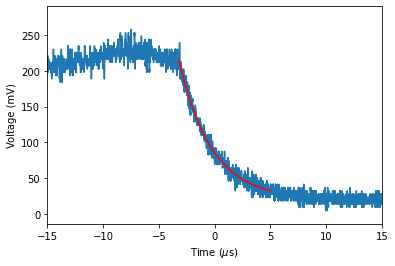

Reflectivity 0.9951640964127957
Finesse 646.4976313173702


In [5]:
data = pd.read_csv("ring_down/ring_down_05.txt", sep = "\t", skiprows = range(0,1))
x = data['(us)']
y = data['(mV)']

xnp = x.to_numpy()
ynp = y.to_numpy()

xnp = xnp[~np.isnan(xnp)]
ynp = ynp[~np.isnan(ynp)]

start = np.where(xnp>=-3.2)
print(start[0][0])
end = np.where(xnp>=5)
print(end[0][0])
xnp1 = xnp[start[0][0]:end[0][0]]
ynp1 = ynp[start[0][0]:end[0][0]]
# print(xnp1)

# Calculating the derivative 
# dydx = diff(ynp1) / diff(xnp1)
# print(dydx) #does not work


def exp_decay(t, a, k, c):
    return a * np.exp(-k * t) + c

def fit_nonlinear(t, y):
    opt_para, para_cov = sp.optimize.curve_fit(exp_decay, t, y, maxfev = 5000)
    a, k, c = opt_para
    return a, k, c

a, k, c = fit_nonlinear(xnp1, ynp1)
# y_err = sem(ynp)
# print(y_err)
print("Amplitude:", a, "Decay constant:", 1/k, "Constant:", c)
fit = exp_decay(xnp1, a, k ,c)

plt.plot(x, y)
plt.xlabel('Time (' r'$\mu$' 's)')
plt.ylabel("Voltage (mV)")
plt.plot(xnp1, fit, color = "red")
plt.xlim(-15, 15)
plt.show()

p = 0.9981852868527146
t_dec = k * 10 ** (-6)
c = 299792458
r = np.sqrt(np.exp((-p) / (c * t_dec)))
print('Reflectivity', r)
f = (np.pi * r) / (1 - r)
print("Finesse", f)

# Code to look at all the data

ring_down_01.txt


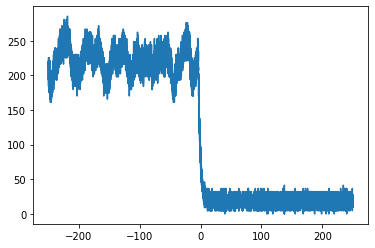

246802
255002
ring_down_02.txt


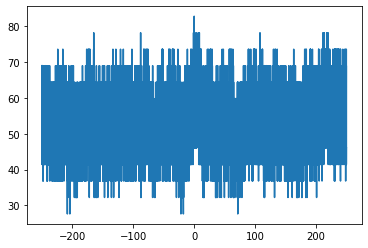

246802
255002
ring_down_03.txt


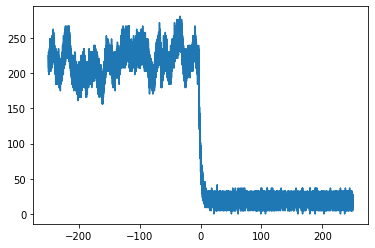

246802
255002
ring_down_04.txt


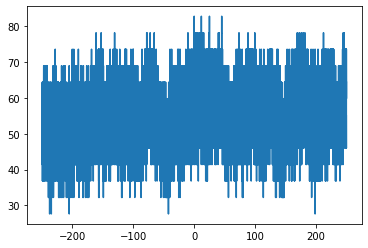

246802
255002
ring_down_05.txt


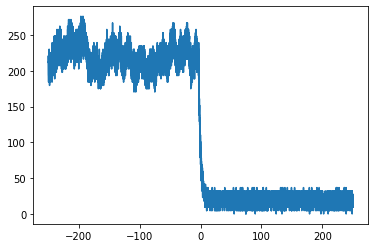

246802
255002
ring_down_06.txt


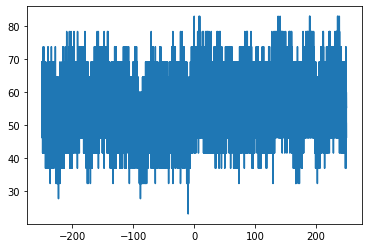

246802
255002
ring_down_07.txt


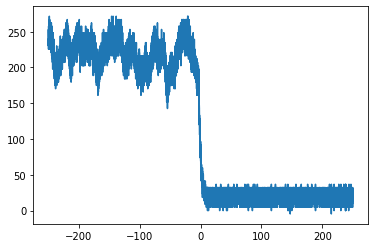

246802
255002
ring_down_08.txt


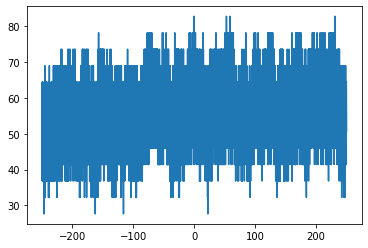

246802
255002
ring_down_09.txt


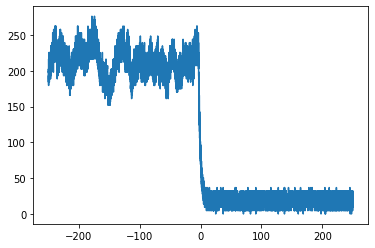

246802
255002
ring_down_10.txt


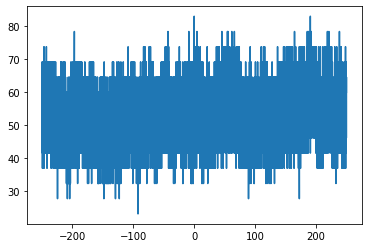

246802
255002
ring_down_11.txt


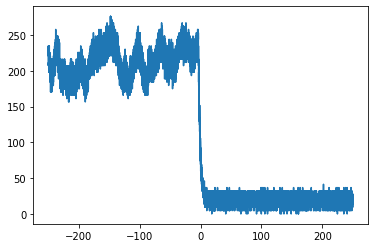

246802
255002
ring_down_12.txt


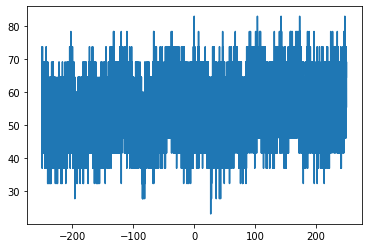

246802
255002
ring_down_13.txt


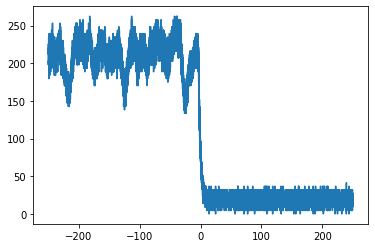

246802
255002
ring_down_14.txt


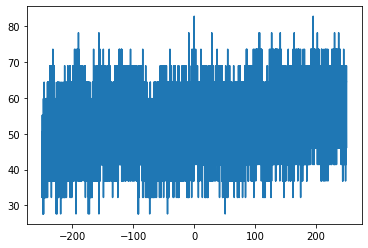

246802
255002
ring_down_15.txt


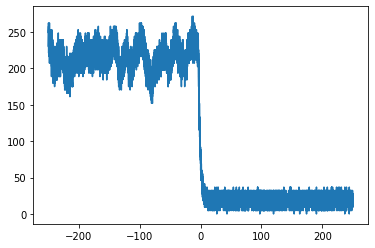

246802
255002
ring_down_16.txt


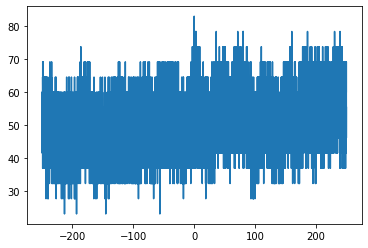

246802
255002
ring_down_17.txt


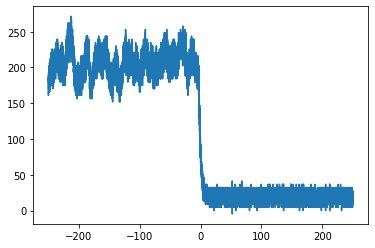

246802
255002
ring_down_18.txt


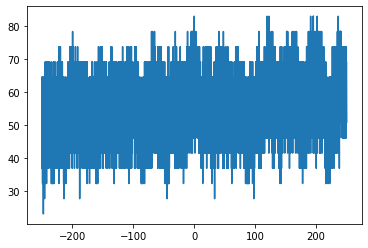

246802
255002
ring_down_19.txt


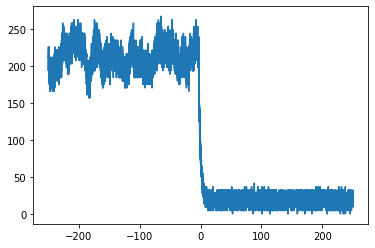

246802
255002
ring_down_20.txt


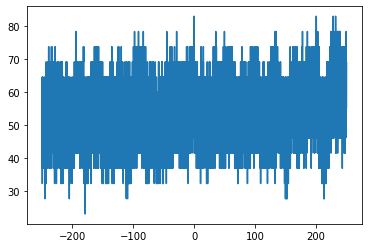

246802
255002
ring_down_21.txt


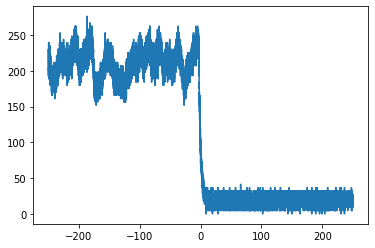

246802
255002
ring_down_22.txt


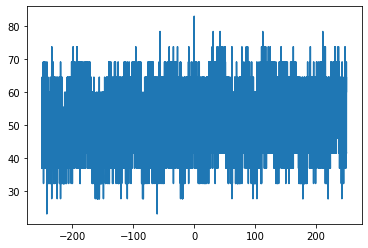

246802
255002
ring_down_23.txt


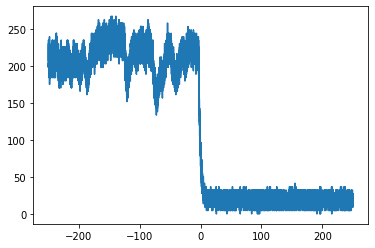

246802
255002
ring_down_24.txt


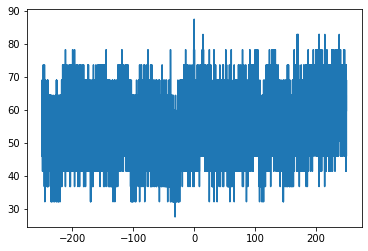

246802
255002
ring_down_25.txt


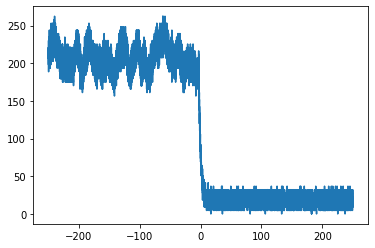

246802
255002
ring_down_26.txt


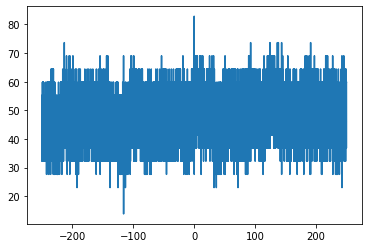

246802
255002
ring_down_27.txt


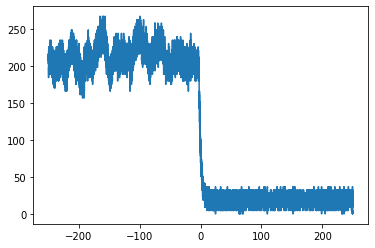

246802
255002
ring_down_28.txt


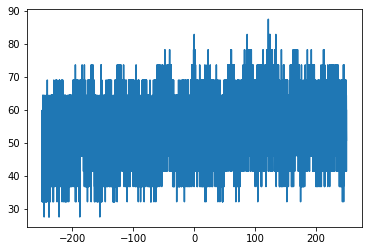

246802
255002
ring_down_29.txt


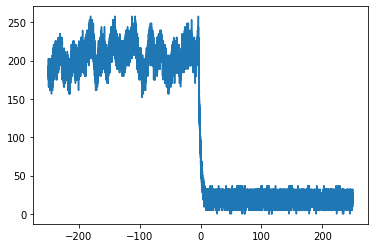

246802
255002
ring_down_30.txt


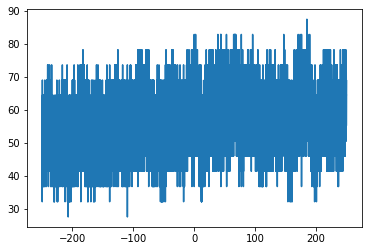

246802
255002
ring_down_31.txt


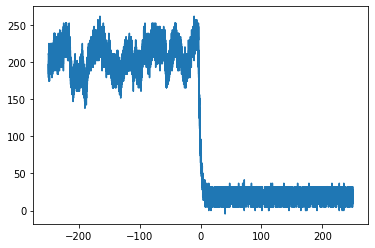

246802
255002
ring_down_32.txt


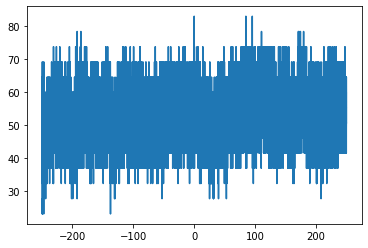

246802
255002


In [6]:
directory_ring = os.path.join(os.getcwd(), "ring_down")
for filename in os.listdir(directory_ring):
    print(filename)
    f = os.path.join(directory_ring, filename)
    data = pd.read_csv(f, sep = "\t", skiprows = range(0,1))
    
    x = data['(us)']
    y = data['(mV)']

    xnp = x.to_numpy()
    ynp = y.to_numpy()
    plt.plot(xnp, ynp)
    plt.show()
    
    xnp = xnp[~np.isnan(xnp)]
    ynp = ynp[~np.isnan(ynp)]

    start = np.where(xnp>=-3.2)
    print(start[0][0])
    end = np.where(xnp>=5)
    print(end[0][0])
    xnp1 = xnp[start[0][0]:end[0][0]]
    ynp1 = ynp[start[0][0]:end[0][0]]
    
    

# Creating array with suitable files (need to adjust limits in some plots)

ring_down_03.txt
246802
255002
Amplitude: 66.12124806200706 Decay constant: 3.0490522755749674 Constant: 17.995617359486538


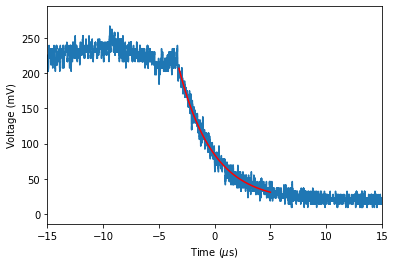

Reflectivity 0.9949368178301293
Finesse 618.9051129851298


ring_down_05.txt
246802
255002
Amplitude: 64.7703372980219 Decay constant: 2.91185264397831 Constant: 20.862398546225982


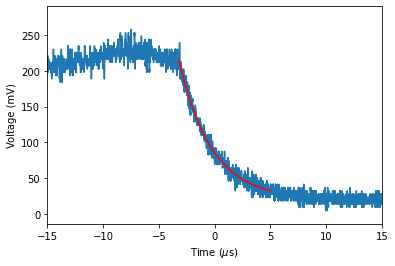

Reflectivity 0.9951640964127957
Finesse 648.0665239835183


ring_down_17.txt
246802
255002
Amplitude: 61.84663485713008 Decay constant: 2.9782402355015907 Constant: 18.20120369069784


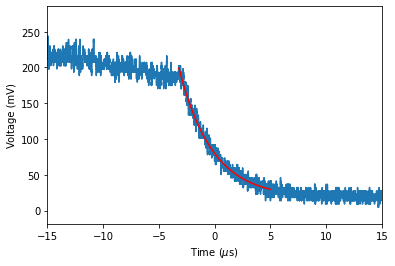

Reflectivity 0.9950541153078568
Finesse 633.6205231624323


ring_down_29.txt
246802
255002
Amplitude: 61.787730159256704 Decay constant: 2.9156613835885246 Constant: 18.501884516490406


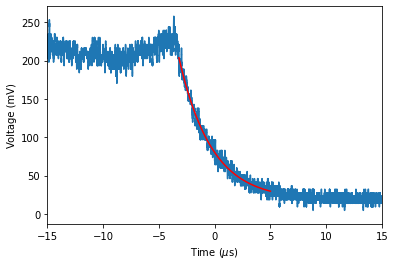

Reflectivity 0.9951577863298173
Finesse 647.2199505471474


ring_down_01.txt
246802
255002
Amplitude: 59.46859332793935 Decay constant: 3.0983804681144393 Constant: 18.823351650391608


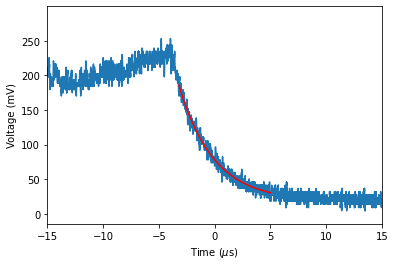

Reflectivity 0.9948551157078002
Finesse 609.0517276524303


ring_down_15.txt
246802
255002
Amplitude: 56.6832694287542 Decay constant: 2.8877192454543623 Constant: 19.797385613264026


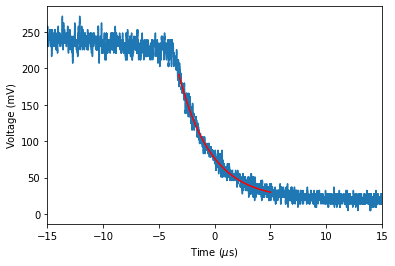

Reflectivity 0.9952040800569489
Finesse 653.48259004286


ring_down_11.txt
246802
255002
Amplitude: 63.604023944404716 Decay constant: 3.031465636055148 Constant: 16.951987446588912


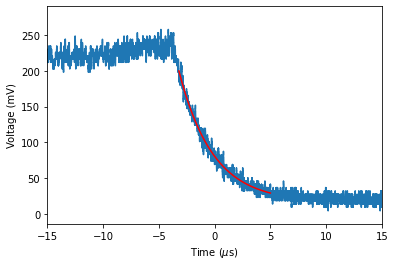

Reflectivity 0.9949659481455596
Finesse 622.4956153128323


ring_down_13.txt
246802
255002
Amplitude: 59.92160513260155 Decay constant: 2.8995938170300413 Constant: 19.726355668065697


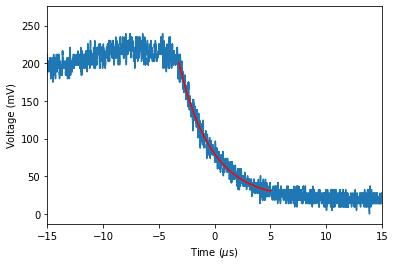

Reflectivity 0.9951844063467284
Finesse 650.8064080482584


ring_down_07.txt
246802
255002
Amplitude: 58.560037893637464 Decay constant: 2.959083788430925 Constant: 19.142173661461513


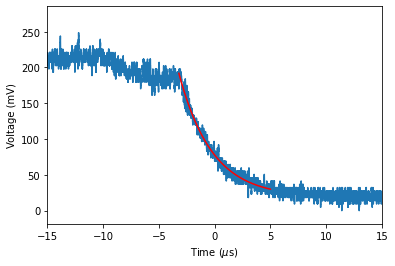

Reflectivity 0.9950858496174924
Finesse 637.7224491870287


ring_down_23.txt
246802
255002
Amplitude: 59.75278054734793 Decay constant: 2.8398782710351207 Constant: 20.85655358620978


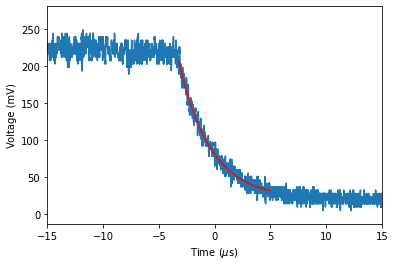

Reflectivity 0.995283346601222
Finesse 664.491267388593


ring_down_09.txt
246802
255002
Amplitude: 63.94574601140421 Decay constant: 3.0083069500874307 Constant: 17.469258337573677


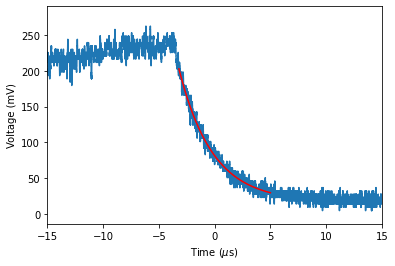

Reflectivity 0.9950043092382193
Finesse 627.2877496235088


ring_down_25.txt
246802
255002
Amplitude: 65.16513855042032 Decay constant: 2.9705475424414436 Constant: 17.501051790469557


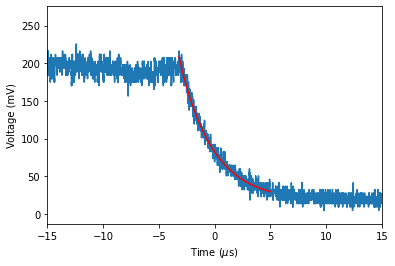

Reflectivity 0.9950668587969335
Finesse 635.2613850251612




In [7]:
# list of suitable files
suit = ['ring_down_03.txt', 'ring_down_05.txt', 'ring_down_17.txt', 'ring_down_29.txt', 'ring_down_01.txt', 'ring_down_15.txt', 
        'ring_down_11.txt', 'ring_down_13.txt', 'ring_down_07.txt', 'ring_down_23.txt', 'ring_down_09.txt', 'ring_down_25.txt']

refl_arr = np.zeros(len(suit))
fin_arr = np.zeros(len(suit))

# looping over all files 
for i, name in enumerate(suit):
    print (name)
    f = os.path.join(os.getcwd(), "ring_down", name)
    data = pd.read_csv(f, sep = "\t", skiprows = range(0,1))
    
    x = data['(us)']
    y = data['(mV)']

    # converting to numpy 
    xnp = x.to_numpy()
    ynp = y.to_numpy()
    
    # removing nan data 
    xnp = xnp[~np.isnan(xnp)]
    ynp = ynp[~np.isnan(ynp)]

    # setting upper and lower cuts to observe exponential decay in that region
    start = np.where(xnp>=-3.2)
    print(start[0][0])
    end = np.where(xnp>=5)
    print(end[0][0])
    xnp1 = xnp[start[0][0]:end[0][0]]
    ynp1 = ynp[start[0][0]:end[0][0]]
    
    #defining exp_decay function for the fit
    def exp_decay(t, a, k, c):
        return a * np.exp(-k * t) + c

    # defining fit function 
    def fit_nonlinear(t, y):
        opt_para, para_cov = sp.optimize.curve_fit(exp_decay, t, y, maxfev = 5000)
        a, k, c = opt_para
        return a, k, c
    
    a, k, c = fit_nonlinear(xnp1, ynp1)
    print("Amplitude:", a, "Decay constant:", 1/k, "Constant:", c)
    fit = exp_decay(xnp1, a, k ,c)

    # plotting 
    plt.plot(x, y)
    plt.xlabel('Time (' r'$\mu$' 's)')
    plt.ylabel("Voltage (mV)")
    plt.plot(xnp1, fit, color = "red")
    plt.xlim(-15, 15)
    plt.show()

    # computing reflectivity and finesse, based on the value of perimeter calculated 
    p = 0.9981852868527146
    t_dec = k * 10 ** (-6)
    c = 299792458
    r = np.sqrt(np.exp((-p) / (c * t_dec)))
    print('Reflectivity', r)
    f = (np.pi * np.sqrt(r)) / (1 - r)
    print("Finesse", f)
    print('\n')

    # append them to array
    refl_arr[i] = r
    fin_arr[i] = f

In [8]:
print(np.mean(fin_arr))
print(np.mean(refl_arr))

637.3676085799083
0.9950802275326253
